<a href="https://colab.research.google.com/github/sanjay-29218/tensorflow/blob/main/02_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resources: Hands-On Machine Learning with scikit-Learn, Kerass and TensorFlow,2nd edition

### Introduction to Regression with Neural Network in TensorFlow

Regression: Predicting a numerical variable based on some other combination of variable

In [183]:
import tensorflow as tf

In [184]:
print(tf.__version__)

2.8.2


## Creating data to view and fit

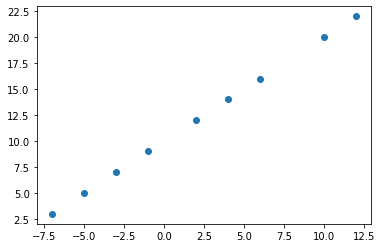

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Create feature
X = np.array([-7.0,-5.0,-3.0,-1.0,2.0,4.0,6.0,10.0,12.0])

# Create labels
y = np.array([3.0,5.0,7.0,9.0,12.0,14.0,16.0,20.0,22.0])

#visualize it
plt.scatter(X,y);

In [31]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [32]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant([1,2,3])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [33]:
X[0],y[0]

(-7.0, 3.0)

In [35]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

((), ())

In [56]:
# Turn our Numpy arrays into tensor
X = tf.cast(tf.constant(X ),dtype=tf.float32);
y = tf.cast(tf.constant(y),dtype=tf.float32);
X,y
 

(<tf.Tensor: shape=(9,), dtype=float32, numpy=array([-7., -5., -3., -1.,  2.,  4.,  6., 10., 12.], dtype=float32)>,
 <tf.Tensor: shape=(9,), dtype=float32, numpy=array([ 3.,  5.,  7.,  9., 12., 14., 16., 20., 22.], dtype=float32)>)

## Steps in modeling with tensorflow
1. **Creating a model** - define the input and output layers, as 
well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which
tells our model how wrong it is) and optimizer (tells our model how to improve 
its learning) and evaluation metrics (what we can use to interpret the 
performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y(feature 
and labels)

In [61]:
# Set random seed
tf.random.set_seed(42)

In [62]:
# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 326ms/step - loss: 10.8599 - mae: 10.8599
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 10.8099 - mae: 10.8099
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 10.7599 - mae: 10.7599
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 10.7099 - mae: 10.7099
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.6599 - mae: 10.6599


In [63]:
#Check out X and Y
X , y

(<tf.Tensor: shape=(9,), dtype=float32, numpy=array([-7., -5., -3., -1.,  2.,  4.,  6., 10., 12.], dtype=float32)>,
 <tf.Tensor: shape=(9,), dtype=float32, numpy=array([ 3.,  5.,  7.,  9., 12., 14., 16., 20., 22.], dtype=float32)>)

In [64]:
# Try and make a prediction using our model
model.predict([17.0])

array([[11.441017]], dtype=float32)

### Improving a model
How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [83]:
# Let's rebuild the model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=1),
              metrics=['mae'])

#3. Fit the model
model.fit(tf.expand_dims(X,-1),y,epochs=100 )


Epoch 1/100
1/1 [==============================] - 1s 620ms/step - loss: 9.0915 - mae: 9.0915
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 9.2011 - mae: 9.2011
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 8.0086 - mae: 8.0086
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 5.9873 - mae: 5.9873
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 5.8461 - mae: 5.8461
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 5.2471 - mae: 5.2471
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 4.1724 - mae: 4.1724
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 2.7516 - mae: 2.7516
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 3.0988 - mae: 3.0988
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 2.5662 - mae: 2.5662
Epoch 11/100
1/1 [==============================] - 0s 15ms/step - l

In [86]:
model.predict([5])

array([[15.435858]], dtype=float32)

### Evaluating a model
A typical workflow you'll go through when building neural networks is:

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

Visualize, visualize, visualize
When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

The data - what data are you working with? 
What does it look like?

The model itself - what does the architecture look like? What are the different shapes?

The training of a model - how does a model perform while it learns?

The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?
Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).

In [88]:
# Make labels for the dataset
X = tf.range(-100,100,4) 

In [89]:
y = X + 10


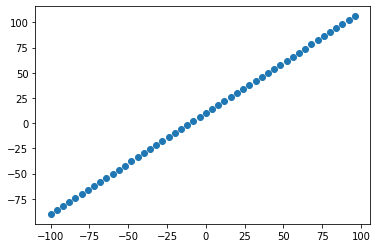

In [91]:
#Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [95]:
### The three set
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]
X_train,X_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>)

### Visualizing the data


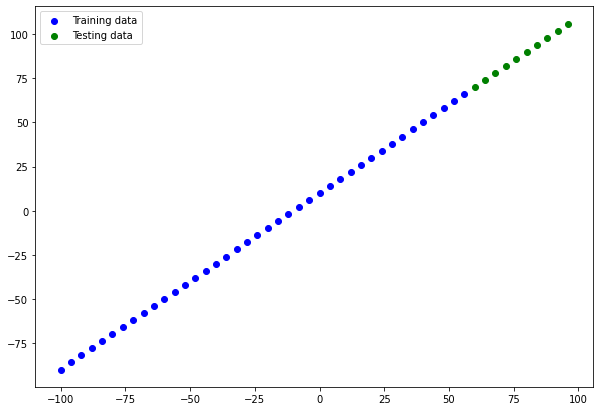

In [98]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,y_train,c='b',label='Training data')
# Plot testing data in green
plt.scatter(X_test, y_test , c='g' , label='Testing data')
# Show a legend
plt.legend();


In [153]:
from os import name
# Let's create a model
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1],name='hidden_layer'),# Fully connected layer , hidden layer
    tf.keras.layers.Dense(1, name='output_layer'), # output layer
], name = 'model_1')
# 2. Complile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])



In [151]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

Total params - total number of parameters in the model.
Trainable parameters - these are the parameters (patterns) the model can update as it trains.
Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).
📖 Resource: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

🛠 Exercise: Try playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)). How does this change the Total/Trainable params? Investigate what's causing the change.

For now, all you need to think about these parameters is that their learnable patterns in the data.

Let's fit our model to the training data.

In [154]:
 # 3. Fit the model
model.fit(tf.expand_dims(X_train,-1),y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 95.1303 - mae: 95.1303
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 88.3809 - mae: 88.3809
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 82.0689 - mae: 82.0689
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 75.8718 - mae: 75.8718
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 69.9995 - mae: 69.9995
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 64.2768 - mae: 64.2768
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 58.6867 - mae: 58.6867
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 53.0715 - mae: 53.0715
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 47.9728 - mae: 47.9728
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 42.9412 - mae: 42.9412
Epoch 11/100
2/2 [==============================] - 0s 6ms

In [143]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


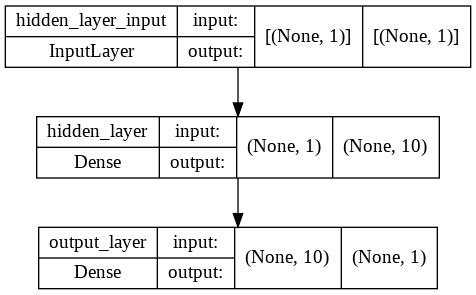

In [144]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

 ### Visualize our model's Prediction

In [158]:
# Make some prediction
y_pred = model.predict(X_test)
y_pred

array([[ 66.66021 ],
       [ 70.57959 ],
       [ 74.49898 ],
       [ 78.41836 ],
       [ 82.33776 ],
       [ 86.25713 ],
       [ 90.17653 ],
       [ 94.09592 ],
       [ 98.01531 ],
       [101.934685]], dtype=float32)

In [159]:
# Let's create a plotting fuction
def plot_predictions(train_data=X_train,train_labels=y_train,
                     test_data=X_test,test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  #plot training data in color blue
  plt.scatter(train_data,train_labels,c='b',label='Training data')
  #Plot testing data in green
  plt.scatter(test_data , test_labels , c='g' , label='Testing data')
  # Plot model's prediction 
  plt.scatter(test_data , predictions , c='r' , label='Predictions')
  # show the legend
  plt.legend()

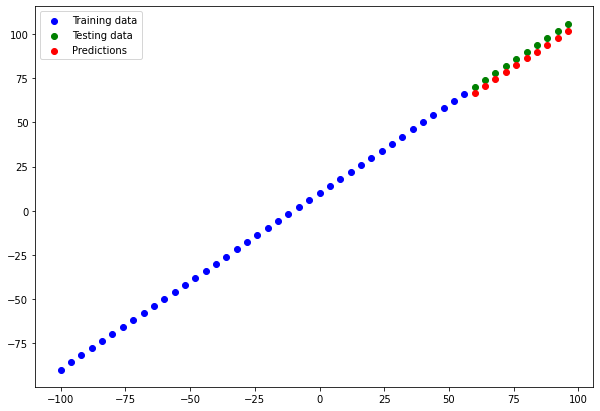

In [160]:
plot_predictions()

#Evaluation our model's predictions with regression evaluation metrics
  

In [185]:
#Evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 48ms/step - loss: 3.7026 - mae: 3.7026


[3.7025527954101562, 3.7025527954101562]

In [186]:
mae = tf.keras.losses.MAE(y_test , y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.7025528>

In [187]:
X_test,y_test


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [188]:
y_test , y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 66.66021 ,  70.57959 ,  74.49898 ,  78.41836 ,  82.33776 ,
         86.25713 ,  90.17653 ,  94.09592 ,  98.01531 , 101.934685],
       dtype=float32)>)

In [189]:
y_pred = tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 66.66021 ,  70.57959 ,  74.49898 ,  78.41836 ,  82.33776 ,
        86.25713 ,  90.17653 ,  94.09592 ,  98.01531 , 101.934685],
      dtype=float32)>

In [190]:
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 66.66021 ,  70.57959 ,  74.49898 ,  78.41836 ,  82.33776 ,
        86.25713 ,  90.17653 ,  94.09592 ,  98.01531 , 101.934685],
      dtype=float32)>

In [191]:
mae = tf.keras.losses.mae(y_test , y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.7025528>

In [192]:
mse = tf.keras.losses.mse(y_test , y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.762509>

In [199]:
# Make function for mse and mae
def mae(y_true , y_pred):
  return tf.keras.losses.mae(y_true,y_pred)

# for mse
def mse(y_true , y_pred):
  return tf.keras.losses.mse(y_true,y_pred)

# Running experiment to imporve our model

# Model_1

In [208]:
# Set the seed
tf.random.set_seed(42)
# Create first model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    
])
# Compile the model
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(lr=1),
    loss=tf.keras.losses.mae,
    metrics=['mae']
  
)
# Fit the model
model_1.fit(tf.expand_dims(X_train,-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 19.2644 - mae: 19.2644
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 25.4689 - mae: 25.4689
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 13.9846 - mae: 13.9846
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 13.4356 - mae: 13.4356
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 12.8921 - mae: 12.8921
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8873 - mae: 11.8873
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.8291 - mae: 9.8291
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 7.9334 - mae: 7.9334
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 13.4364 - mae: 13.4364
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 17.4681 - mae: 17.4681
Epoch 11/100
2/2 [==============================] - 0s 9ms/step

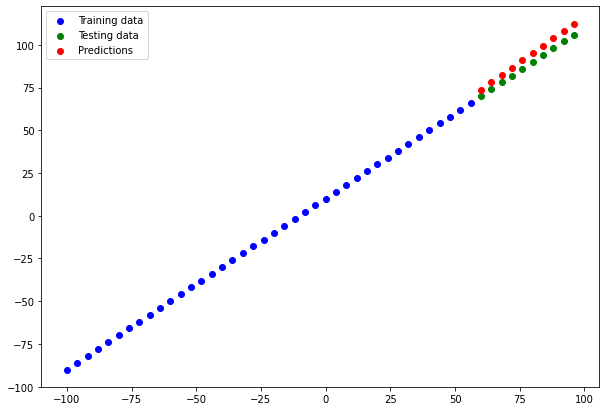

In [209]:
# Make and plot predictions for model_1
y_preds_1 = tf.squeeze(model_1.predict(X_test))

plot_predictions(predictions=y_preds_1)

In [210]:
y_preds_1, y_test

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 73.7817  ,  78.07781 ,  82.373924,  86.670044,  90.966156,
         95.262276,  99.55839 , 103.85451 , 108.15062 , 112.44673 ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [211]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test , y_preds_1)
mse_1 = mse(y_test , y_preds_1)
mae_1 , mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=5.114216>,
 <tf.Tensor: shape=(), dtype=float32, numpy=26.878597>)

Build model_2
2 dense layers, trained for 100 epochs

In [217]:
# Set the random seed
tf.random.set_seed(42)
# Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    
])
# Compile the model
model_2.compile(
    loss= tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics = ['mae']
)

# fitting the model
model_2.fit(tf.expand_dims(X_train,-1),y_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 11ms/step - loss: 24.7643 - mae: 24.7643
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 19.0262 - mae: 19.0262
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 13.5870 - mae: 13.5870
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8757 - mae: 8.8757
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6327 - mae: 8.6327
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.8266 - mae: 10.8266
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.7706 - mae: 11.7706
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8001 - mae: 11.8001
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1962 - mae: 11.1962
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.0506 - mae: 10.0506
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 8

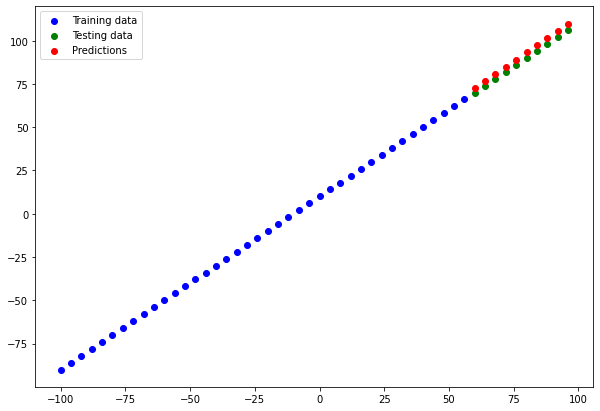

In [221]:
# Make and plot prediction of model_2
y_preds_2 = tf.squeeze(model_2.predict(X_test))
plot_predictions(predictions=y_preds_2)

In [223]:
mae_2 = mae(y_test , y_preds_2)
mse_2 = mse(y_test , y_preds_2)
mae_2 , mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1409538>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.072696>)

Build model_3

In [225]:
# 2layers, trained for 500 epochs
tf.random.set_seed(42)
# create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# compile the model
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.1)

)
# fit the model
model_3.fit(tf.expand_dims(X_train,-1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 7ms/step - loss: 23.1334
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 13.8879
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 11.2354
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 9.9052
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 11.6202
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 13.3254
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 6.4085
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 12.4448
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 8.3798
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 7.1615
Epoch 11/500
2/2 [==============================] - 0s 5ms/step - loss: 11.3141
Epoch 12/500
2/2 [==============================] - 0s 8ms/step - loss: 5.8087
Epoch 13/500
2/2 [==============================] - 0s

In [230]:
# Predict the model
y_preds_3 = tf.squeeze(model_3.predict(y_test))
y_preds_3


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.62804 ,  80.45552 ,  84.28301 ,  88.1105  ,  91.93798 ,
        95.76548 ,  99.59297 , 103.420456, 107.24793 , 111.07543 ],
      dtype=float32)>

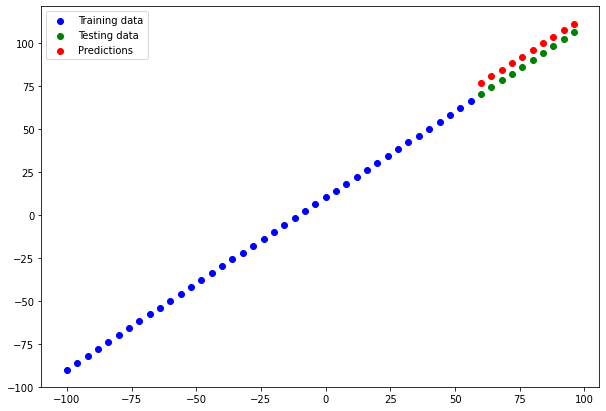

In [231]:
# Plot the predicted and test data
plot_predictions(predictions=y_preds_3)

In [232]:
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)


Comparing the model

In [235]:
import pandas as pd

model_results = [['model_1',mae_1.numpy(),mse_1.numpy()],
                 ['model_2',mae_2.numpy(),mse_2.numpy()],
                 ['model_1',mae_3.numpy(),mse_3.numpy()],
                 ]
all_results = pd.DataFrame(model_results,columns=['model','mae','mse'])

In [237]:
all_results

,model,mae,mse
0,model_1,5.114216,26.878597
1,model_2,3.140954,10.072696
2,model_1,5.851732,34.488289
